0.38510704040527344
<class 'PIL.MpoImagePlugin.MpoImageFile'>


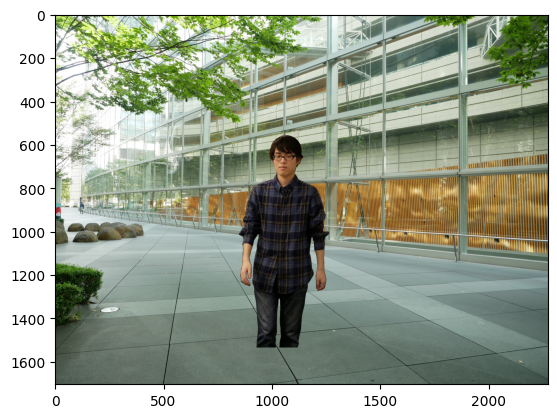

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

root_path = os.getcwd()
mask_path =  root_path+"/test_imgs/mask.png"
mask_image = Image.open(mask_path)
mask_pixels = mask_image.load()


foreground_path = root_path+"/test_imgs/foreground.jpg"
foreground_image = Image.open(foreground_path)
foreground_pixels = foreground_image.load()

background_path = root_path+"/test_imgs/background.jpg"
background_image = Image.open(background_path)
background_pixels = background_image.load()

import time 
start_time = time.time()
count = 0
for i in range(mask_image.size[0]):
    for j in range(mask_image.size[1]):

        if mask_pixels[i,j] == (255, 0,0): # RGB
            background_pixels[i,j] = foreground_pixels[i,j]
        count =  count+1

print(time.time()- start_time)
print(type(background_image))
np_image = np.array(background_image)
plt.imshow(np_image)


#background_image.save("result3.jpg")




In [2]:
mask_image.size

(2048, 1536)

### Solution-2

In [3]:
import cv2
import os

root_path = os.getcwd()
mask_path = root_path+"/test_imgs/mask.png"


bgr_img = cv2.imread(mask_path)
print(bgr_img.shape)

(1536, 2048, 3)


In [12]:
width, height, channel = bgr_img.shape
print(width*height*channel)
print(width*height)

9437184
3145728


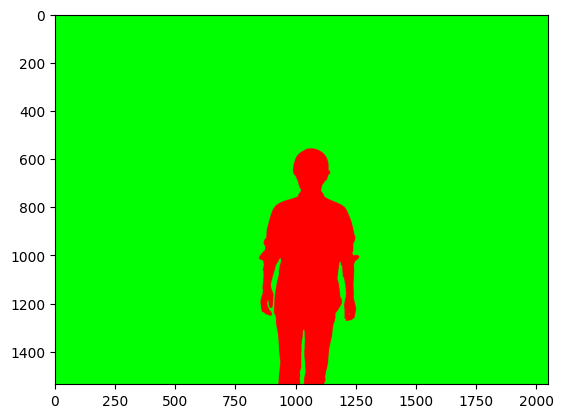

In [4]:
import matplotlib.pyplot as plt
rgb_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

(1536, 2048)


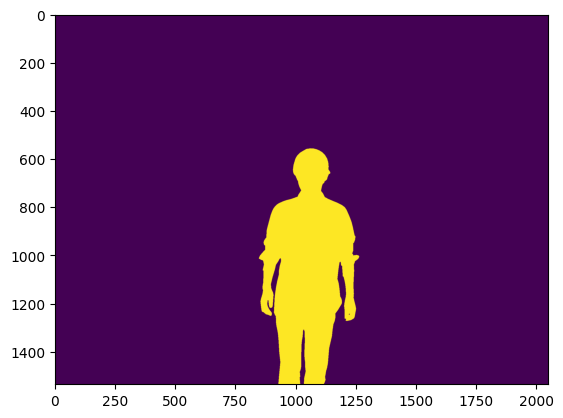

In [5]:
red_channel = rgb_img[:,:,0]
print(red_channel.shape)
plt.imshow(red_channel)

In [6]:
background_path = root_path+"/test_imgs/background.jpg"
background_bgr_img = cv2.imread(background_path)
background_rgb_img = cv2.cvtColor(background_bgr_img,cv2.COLOR_BGR2RGB)

foreground_path = root_path+"/test_imgs/foreground.jpg"
foreground_bgr_img = cv2.imread(foreground_path)
foreground_rgb_img = cv2.cvtColor(foreground_bgr_img,cv2.COLOR_BGR2RGB)


In [9]:
width, height = red_channel.shape

import time 
start_time = time.time()
for i in range(width):
    for j in range(height):
        red_value = red_channel[i,j]
        if red_value == 255:
            person_value = foreground_rgb_img[i,j]
            background_rgb_img[i,j] = person_value


print(time.time() - start_time)

0.4153599739074707


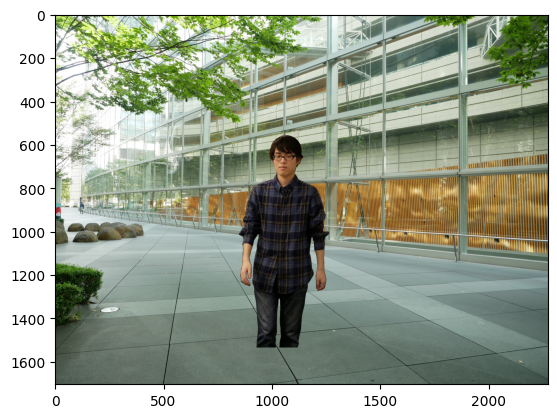

In [10]:
plt.imshow(background_rgb_img)